In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

# traitement de l'information

In [2]:
data = pd.read_csv("French luxury companies 2000-2022.csv")

print(data.shape)
data.head()

(22941, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,1999/12/31,CDI.PA,32.674278,61.500000,61.500000,61.500000,61.500000,0
1,2000/1/3,RMS.PA,37.210770,49.033333,50.000000,48.333332,49.666664,16395
2,2000/1/3,MC.PA,57.833614,88.800003,93.180000,88.199997,91.779999,615855
3,2000/1/3,CDI.PA,32.844299,61.820000,63.950001,61.750000,62.200001,424416
4,2000/1/3,KER.PA,120.705658,239.145950,249.091003,235.149338,246.116775,185169


les données montrent
Historique des cours boursiers quotidiens des quatre grandes entreprises françaises du luxe (Hermès, Louis Vuitton, Christian Dior, Kering) de 2000 à 2022
RMS.PA = Hermès MC.PA = Louis Vuitton CDI.PA = Christian Dior KER.PA = Kering

Source des données : jeu de données public

In [3]:
# Visualisez le volume de données de chaque marque
print('The shape of CDI.PA equals', data[data['Symbol'] == 'CDI.PA'].shape)
print('The shape of RMS.PA equals', data[data['Symbol'] == 'RMS.PA'].shape)
print('The shape of MC.PA equals', data[data['Symbol'] == 'MC.PA'].shape)
print('The shape of KER.PA equals', data[data['Symbol'] == 'KER.PA'].shape)

The shape of CDI.PA equals (5729, 8)
The shape of RMS.PA equals (5755, 8)
The shape of MC.PA equals (5733, 8)
The shape of KER.PA equals (5724, 8)


In [4]:
# données brutes de groupe
groups = data.groupby(data.Symbol)
CDI = groups.get_group("CDI.PA")
RMS = groups.get_group("RMS.PA")
MC = groups.get_group("MC.PA")
KER = groups.get_group("KER.PA")

print("Group with Symbol CDI.PA:")
print(CDI.head(),"\n")

print("Group with Symbol RMS.PA:")
print(RMS.head(),"\n")

print("Group with Symbol MC.PA:")
print(MC.head(),"\n")

print("Group with Symbol KER.PA:")
print(KER.head(),"\n")

Group with Symbol CDI.PA:
          Date  Symbol  Adj Close      Close       High        Low       Open  \
0   1999/12/31  CDI.PA  32.674278  61.500000  61.500000  61.500000  61.500000   
3     2000/1/3  CDI.PA  32.844299  61.820000  63.950001  61.750000  62.200001   
7     2000/1/4  CDI.PA  29.688440  55.880001  62.619999  55.680000  62.619999   
11    2000/1/5  CDI.PA  27.892687  52.500000  54.750000  52.150002  54.619999   
15    2000/1/6  CDI.PA  27.016062  50.849998  53.020000  50.849998  53.020000   

     Volume  
0         0  
3    424416  
7   1132848  
11   962416  
15   813360   

Group with Symbol RMS.PA:
        Date  Symbol  Adj Close      Close       High        Low       Open  \
1   2000/1/3  RMS.PA  37.210770  49.033333  50.000000  48.333332  49.666664   
5   2000/1/4  RMS.PA  34.934105  46.033333  48.766666  45.533333  48.766666   
9   2000/1/5  RMS.PA  32.379189  42.666664  45.000000  41.833332  45.000000   
13  2000/1/6  RMS.PA  31.620296  41.666664  42.666664  41.6

In [5]:
# Concaténer différents ensembles de données par date
df1 = pd.merge(CDI, RMS, on = 'Date')
df2 = pd.merge(MC, KER, on = 'Date')
df = pd.merge(df1, df2, on = 'Date')
df.head()
print(df.shape)

(5724, 29)


In [6]:
# Modifier les en-têtes de colonne
df.columns =["date", "CDI", "CDI_adj_close", "CDI_close", "CDI_high", "CDI_low", "CDI_open", "CDI_volume",
             "RMS", "RMS_adj_close", "RMS_close", "RMS_high", "RMS_low", "RMS_open", "RMS_volume",
             "MC", "MC_adj_close", "MC_close", "MC_high", "MC_low", "MC_open", "MC_volume",
             "KER", "KER_adj_close", "KER_close", "KER_high", "KER_low", "KER_open", "KER_volume"]
df.head()

,date,CDI,CDI_adj_close,CDI_close,CDI_high,CDI_low,CDI_open,CDI_volume,RMS,RMS_adj_close,...,MC_low,MC_open,MC_volume,KER,KER_adj_close,KER_close,KER_high,KER_low,KER_open,KER_volume
0,2000/1/3,CDI.PA,32.844299,61.820000,63.950001,61.750000,62.200001,424416,RMS.PA,37.210770,...,88.199997,91.779999,615855,KER.PA,120.705658,239.145950,249.091003,235.149338,246.116775,185169
1,2000/1/4,CDI.PA,29.688440,55.880001,62.619999,55.680000,62.619999,1132848,RMS.PA,34.934105,...,80.400002,90.800003,1691700,KER.PA,115.404533,228.643234,242.584900,226.040787,244.443787,349132
2,2000/1/5,CDI.PA,27.892687,52.500000,54.750000,52.150002,54.619999,962416,RMS.PA,32.379189,...,76.000000,79.000000,1563735,KER.PA,109.540474,217.025177,222.973633,216.095734,222.973633,444817
3,2000/1/6,CDI.PA,27.016062,50.849998,53.020000,50.849998,53.020000,813360,RMS.PA,31.620296,...,74.459999,77.599998,1641215,KER.PA,104.614662,207.266022,216.932236,205.407135,216.560455,591143
4,2000/1/7,CDI.PA,28.094572,52.880001,54.250000,51.279999,51.279999,909968,RMS.PA,33.643993,...,74.019997,76.400002,1360530,KER.PA,102.878922,203.827072,210.054352,202.247025,208.195465,460670


In [7]:
# Vérifier les données
print(df.isnull().sum())

date             0
CDI              0
CDI_adj_close    0
CDI_close        0
CDI_high         0
CDI_low          0
CDI_open         0
CDI_volume       0
RMS              0
RMS_adj_close    0
RMS_close        0
RMS_high         0
RMS_low          0
RMS_open         0
RMS_volume       0
MC               0
MC_adj_close     0
MC_close         0
MC_high          0
MC_low           0
MC_open          0
MC_volume        0
KER              0
KER_adj_close    0
KER_close        0
KER_high         0
KER_low          0
KER_open         0
KER_volume       0
dtype: int64


Comme il s'agit d'une fusion directe, les colonnes dont les dates ne correspondent pas sont automatiquement supprimées et il n'y a pas de valeurs nulles.

In [8]:
# Afficher les informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5724 entries, 0 to 5723
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5724 non-null   object 
 1   CDI            5724 non-null   object 
 2   CDI_adj_close  5724 non-null   float64
 3   CDI_close      5724 non-null   float64
 4   CDI_high       5724 non-null   float64
 5   CDI_low        5724 non-null   float64
 6   CDI_open       5724 non-null   float64
 7   CDI_volume     5724 non-null   int64  
 8   RMS            5724 non-null   object 
 9   RMS_adj_close  5724 non-null   float64
 10  RMS_close      5724 non-null   float64
 11  RMS_high       5724 non-null   float64
 12  RMS_low        5724 non-null   float64
 13  RMS_open       5724 non-null   float64
 14  RMS_volume     5724 non-null   int64  
 15  MC             5724 non-null   object 
 16  MC_adj_close   5724 non-null   float64
 17  MC_close       5724 non-null   float64
 18  MC_high 

In [9]:
# Afficher les propriétés statistiques de chaque attribut sur le jeu de données
df.describe()

,CDI_adj_close,CDI_close,CDI_high,CDI_low,CDI_open,CDI_volume,RMS_adj_close,RMS_close,RMS_high,RMS_low,...,MC_high,MC_low,MC_open,MC_volume,KER_adj_close,KER_close,KER_high,KER_low,KER_open,KER_volume
count,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5.724000e+03,5724.000000,5724.000000,5724.000000,5724.000000,...,5724.000000,5724.000000,5724.000000,5.724000e+03,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5.724000e+03
mean,143.864911,167.394810,169.208933,165.520553,167.367176,1.483434e+05,269.299085,283.834303,286.712979,280.742183,...,166.463055,162.830019,164.737963,1.094502e+06,169.574654,203.139985,205.516523,200.716728,203.193994,4.364613e+05
std,161.577018,162.070325,163.837744,160.292479,161.998179,1.837369e+05,310.612473,309.661550,312.919022,306.121811,...,156.677425,153.368918,155.113159,7.152617e+05,179.177655,175.864868,177.890880,173.841074,175.875973,3.506440e+05
min,11.350244,21.100000,23.600000,20.500000,22.000000,0.000000e+00,27.488520,35.333332,35.966667,33.333332,...,16.680000,16.680000,16.680000,0.000000e+00,19.947632,29.314665,30.518295,28.868530,29.937391,0.000000e+00
25%,34.893769,59.265000,60.495000,57.975000,59.200001,4.864875e+04,45.906929,58.925001,59.358332,57.824999,...,67.869999,66.187498,67.037502,6.129295e+05,54.641747,86.559126,87.588480,85.311342,86.459211,2.156285e+05
50%,75.456905,98.925003,100.474998,97.220001,98.329998,1.069650e+05,140.229919,159.199997,161.474998,157.224998,...,114.449997,111.400002,112.724998,9.160085e+05,91.765610,131.493095,132.887260,130.308060,131.632515,3.277030e+05
75%,153.704300,183.962498,185.350006,182.112503,183.924995,1.838855e+05,365.449364,382.724991,384.725006,379.662491,...,170.549999,167.562504,169.149994,1.362722e+06,156.271492,209.124908,211.343952,205.895092,209.124908,5.383835e+05
max,746.498291,755.500000,755.500000,739.500000,746.500000,3.144592e+06,1664.556763,1675.500000,1678.000000,1632.000000,...,758.500000,741.700012,742.500000,7.183691e+06,774.934937,792.099976,798.000000,788.200012,795.000000,6.150392e+06


# l'analyse des données

array([[<AxesSubplot:title={'center':'CDI_adj_close'}>,
        <AxesSubplot:title={'center':'CDI_close'}>,
        <AxesSubplot:title={'center':'CDI_high'}>,
        <AxesSubplot:title={'center':'CDI_low'}>,
        <AxesSubplot:title={'center':'CDI_open'}>],
       [<AxesSubplot:title={'center':'CDI_volume'}>,
        <AxesSubplot:title={'center':'RMS_adj_close'}>,
        <AxesSubplot:title={'center':'RMS_close'}>,
        <AxesSubplot:title={'center':'RMS_high'}>,
        <AxesSubplot:title={'center':'RMS_low'}>],
       [<AxesSubplot:title={'center':'RMS_open'}>,
        <AxesSubplot:title={'center':'RMS_volume'}>,
        <AxesSubplot:title={'center':'MC_adj_close'}>,
        <AxesSubplot:title={'center':'MC_close'}>,
        <AxesSubplot:title={'center':'MC_high'}>],
       [<AxesSubplot:title={'center':'MC_low'}>,
        <AxesSubplot:title={'center':'MC_open'}>,
        <AxesSubplot:title={'center':'MC_volume'}>,
        <AxesSubplot:title={'center':'KER_adj_close'}>,
        

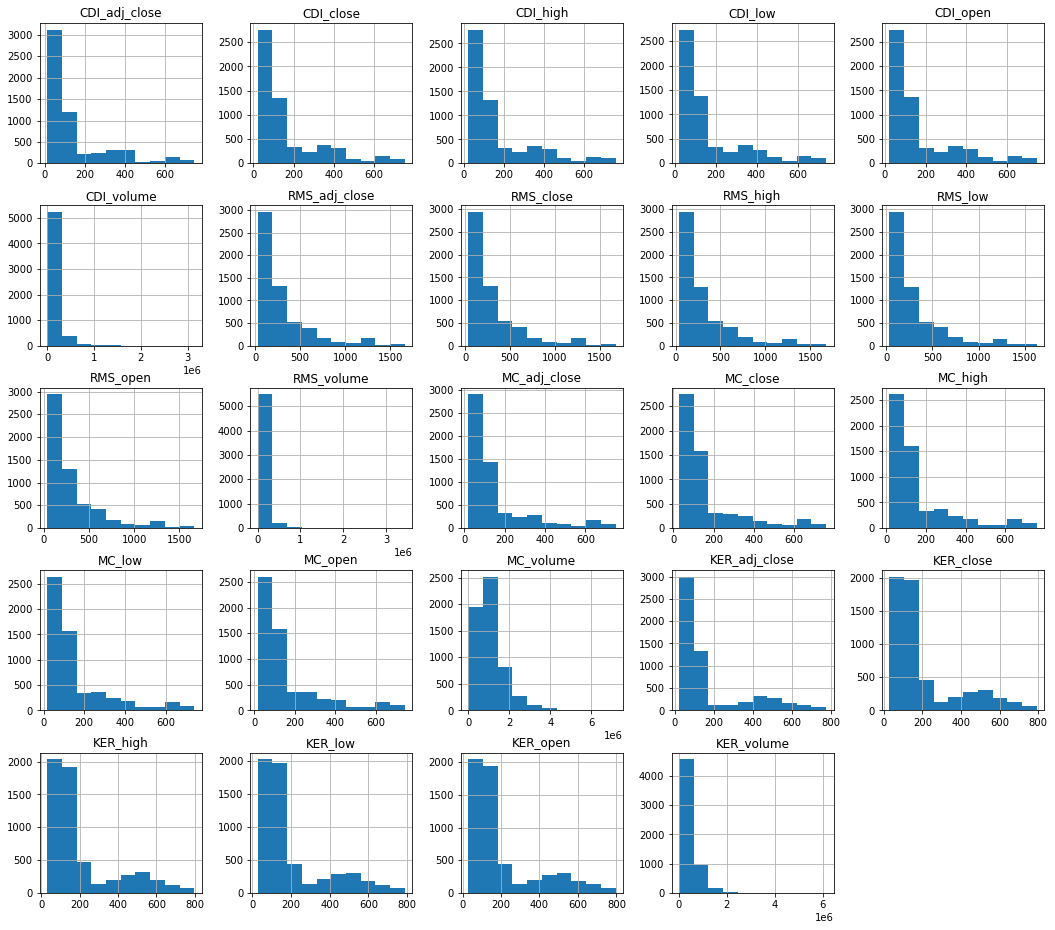

In [10]:
df.hist(figsize=(18,16)) 

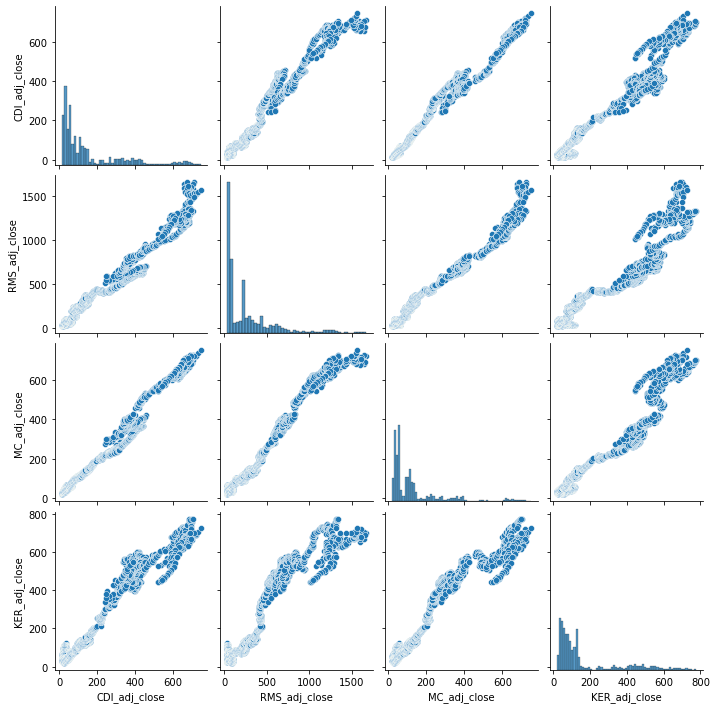

In [11]:
# Afficher la relation entre les variables avec quatre marques de variables adj_close
sns.pairplot(df, vars=['CDI_adj_close','RMS_adj_close', 'MC_adj_close', 'KER_adj_close'])

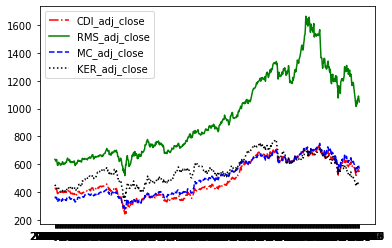

In [12]:
# Liste des cours boursiers de plusieurs marques
x = df['date'][5000:]

y1 = df['CDI_adj_close'][5000:]
y2 = df['RMS_adj_close'][5000:]
y3 = df['MC_adj_close'][5000:]
y4 = df['KER_adj_close'][5000:]

plt.plot(x, y1, ls="-.",color="r", label="CDI_adj_close")
plt.plot(x, y2, ls="-",color="g", label="RMS_adj_close")
plt.plot(x, y3, ls="--",color="b", label="MC_adj_close")
plt.plot(x, y4, ls=":",color="k", label="KER_adj_close")

plt.legend()

plt.show()

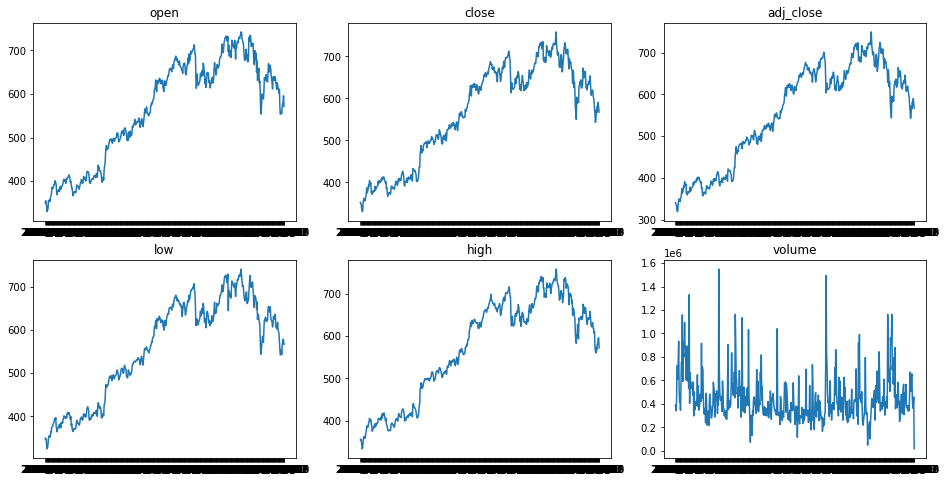

In [13]:
x = df["date"][5200:]

y1 = df['MC_open'][5200:]
y2 = df['MC_close'][5200:]
y3 = df['MC_adj_close'][5200:]
y4 = df['MC_low'][5200:]
y5 = df['MC_high'][5200:]
y6 = df['MC_volume'][5200:]

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6)

ax1.set_title('open')
ax2.set_title('close')
ax3.set_title('adj_close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)
ax4.plot(x,y4)
ax5.plot(x,y5)
ax6.plot(x,y6)

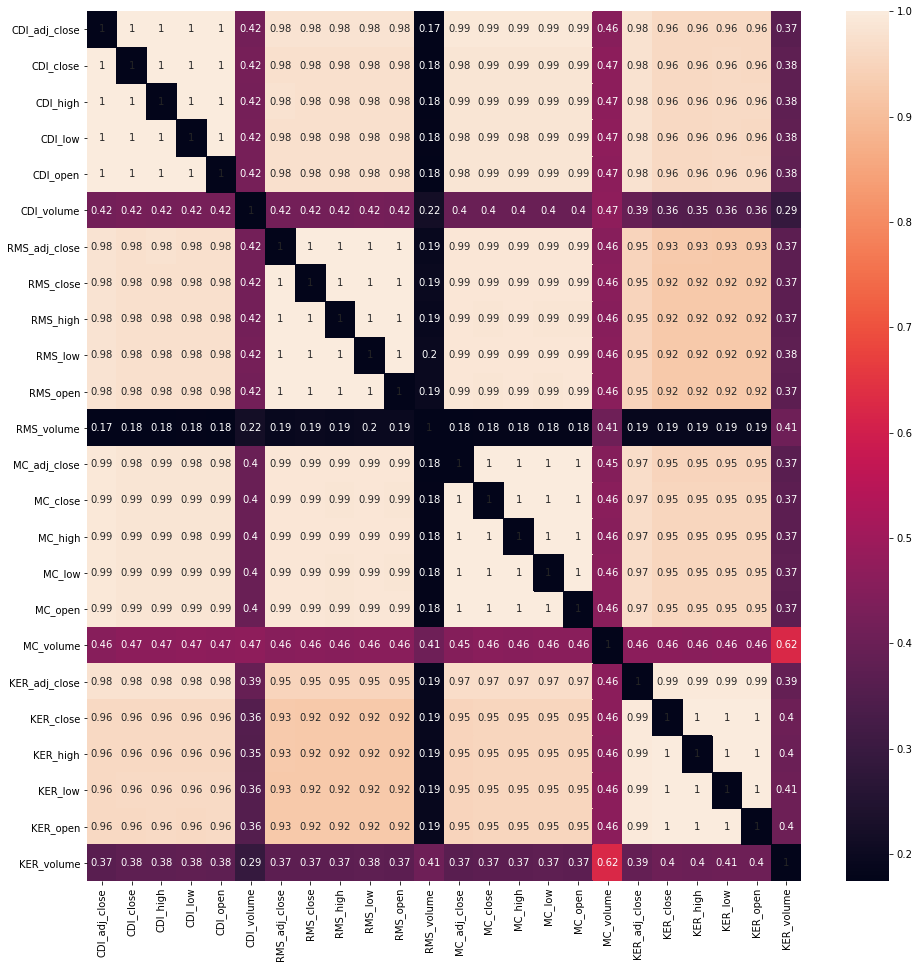

In [14]:
# Carte thermique de corrélation pour les données
cols=data.columns 
df_corr = df.corr().abs()

plt.subplots(figsize=(16, 16))
sns.heatmap(df_corr,annot=True)

sns.heatmap(df_corr, mask=df_corr < 1, cbar=False)

plt.show()

# partition de données

In [15]:
# Supprimer le nom du symbole d'origine
df = df.drop("CDI",axis=1).drop("RMS",axis=1).drop("MC",axis=1).drop("KER",axis=1)
df.head()
print(df.shape)

(5724, 25)


In [16]:
# Partition de l'ensemble d'entraînement (4 000 premières lignes)
df_train = df[:4000]

# Partition de l'ensemble de test (reste)
df_test=df[4000:]

In [17]:
X_train_0 = df_train.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,19,20,21,22,23,24]]
X_test_0 = df_test.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,19,20,21,22,23,24]]

X_train_0.head()

,CDI_adj_close,CDI_close,CDI_high,CDI_low,CDI_open,CDI_volume,RMS_adj_close,RMS_close,RMS_high,RMS_low,RMS_open,RMS_volume,KER_adj_close,KER_close,KER_high,KER_low,KER_open,KER_volume
0,32.844299,61.820000,63.950001,61.750000,62.200001,424416,37.210770,49.033333,50.000000,48.333332,49.666664,16395,120.705658,239.145950,249.091003,235.149338,246.116775,185169
1,29.688440,55.880001,62.619999,55.680000,62.619999,1132848,34.934105,46.033333,48.766666,45.533333,48.766666,33063,115.404533,228.643234,242.584900,226.040787,244.443787,349132
2,27.892687,52.500000,54.750000,52.150002,54.619999,962416,32.379189,42.666664,45.000000,41.833332,45.000000,55344,109.540474,217.025177,222.973633,216.095734,222.973633,444817
3,27.016062,50.849998,53.020000,50.849998,53.020000,813360,31.620296,41.666664,42.666664,41.666664,42.666664,97941,104.614662,207.266022,216.932236,205.407135,216.560455,591143
4,28.094572,52.880001,54.250000,51.279999,51.279999,909968,33.643993,44.333332,44.333332,42.000000,42.666664,131712,102.878922,203.827072,210.054352,202.247025,208.195465,460670


In [18]:
# Rejoignez l'ensemble de données des cours d'ouverture de LV
X_train_1 = df_train.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,17,19,20,21,22,23,24]]
X_test_1 = df_test.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,17,19,20,21,22,23,24]]

X_train_1.head()

,CDI_adj_close,CDI_close,CDI_high,CDI_low,CDI_open,CDI_volume,RMS_adj_close,RMS_close,RMS_high,RMS_low,RMS_open,RMS_volume,MC_open,KER_adj_close,KER_close,KER_high,KER_low,KER_open,KER_volume
0,32.844299,61.820000,63.950001,61.750000,62.200001,424416,37.210770,49.033333,50.000000,48.333332,49.666664,16395,91.779999,120.705658,239.145950,249.091003,235.149338,246.116775,185169
1,29.688440,55.880001,62.619999,55.680000,62.619999,1132848,34.934105,46.033333,48.766666,45.533333,48.766666,33063,90.800003,115.404533,228.643234,242.584900,226.040787,244.443787,349132
2,27.892687,52.500000,54.750000,52.150002,54.619999,962416,32.379189,42.666664,45.000000,41.833332,45.000000,55344,79.000000,109.540474,217.025177,222.973633,216.095734,222.973633,444817
3,27.016062,50.849998,53.020000,50.849998,53.020000,813360,31.620296,41.666664,42.666664,41.666664,42.666664,97941,77.599998,104.614662,207.266022,216.932236,205.407135,216.560455,591143
4,28.094572,52.880001,54.250000,51.279999,51.279999,909968,33.643993,44.333332,44.333332,42.000000,42.666664,131712,76.400002,102.878922,203.827072,210.054352,202.247025,208.195465,460670


In [19]:
y_train_adj = df_train['MC_adj_close'].values
y_train_cls = df_train['MC_close'].values
y_train_opn = df_train['MC_open'].values
y_train_low = df_train['MC_low'].values
y_train_hgh = df_train['MC_high'].values
y_train_vol = df_train['MC_volume'].values

y_test_adj = df_test['MC_adj_close'].values
y_test_cls = df_test['MC_close'].values
y_test_opn = df_test['MC_open'].values
y_test_low = df_test['MC_low'].values
y_test_hgh = df_test['MC_high'].values
y_test_vol = df_test['MC_volume'].values

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_0, y_train_adj)
y_test_adj_lr = lr.predict(X_test_0)
print ('The r2 score of LinearRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lr))
print ('The RMSE of LinearRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lr)))
print ()

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_0, y_train_cls)
y_test_cls_lr = lr.predict(X_test_0)
print ('The r2 score of LinearRegression on test_cls is', r2_score(y_test_cls, y_test_cls_lr))
print ('The RMSE of LinearRegression on test_cls is', np.sqrt(mean_squared_error(y_test_cls, y_test_cls_lr)))
print ()

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_0, y_train_opn)
y_test_opn_lr = lr.predict(X_test_0)
print ('The r2 score of LinearRegression on test_opn is', r2_score(y_test_opn, y_test_opn_lr))
print ('The RMSE of LinearRegression on test_opn is', np.sqrt(mean_squared_error(y_test_opn, y_test_opn_lr)))
print ()

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_0, y_train_low)
y_test_low_lr = lr.predict(X_test_0)
print ('The r2 score of LinearRegression on test_low is', r2_score(y_test_low, y_test_low_lr))
print ('The RMSE of LinearRegression on test_low is', np.sqrt(mean_squared_error(y_test_low, y_test_low_lr)))
print ()

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_0, y_train_hgh)
y_test_hgh_lr = lr.predict(X_test_0)
print ('The r2 score of LinearRegression on test_hghj is', r2_score(y_test_hgh, y_test_hgh_lr))
print ('The RMSE of LinearRegression on test_hgh is', np.sqrt(mean_squared_error(y_test_hgh, y_test_hgh_lr)))
print ()

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_0, y_train_vol)
y_test_vol_lr = lr.predict(X_test_0)
print ('The r2 score of LinearRegression on test_vol is', r2_score(y_test_vol, y_test_vol_lr))
print ('The RMSE of LinearRegression on test_vol is', np.sqrt(mean_squared_error(y_test_vol, y_test_vol_lr)))

The r2 score of LinearRegression on test_adj is 0.848999613866372
The RMSE of LinearRegression on test_adj is 68.34879592668554

The r2 score of LinearRegression on test_cls is 0.7394614395951369
The RMSE of LinearRegression on test_cls is 88.14091691135975

The r2 score of LinearRegression on test_opn is 0.7452359421208475
The RMSE of LinearRegression on test_opn is 87.18902885925725

The r2 score of LinearRegression on test_low is 0.7393209986183793
The RMSE of LinearRegression on test_low is 87.05041963974307

The r2 score of LinearRegression on test_hghj is 0.7529968996029953
The RMSE of LinearRegression on test_hgh is 86.81309717359932

The r2 score of LinearRegression on test_vol is -15.45247179786329
The RMSE of LinearRegression on test_vol is 1352501.3027857991


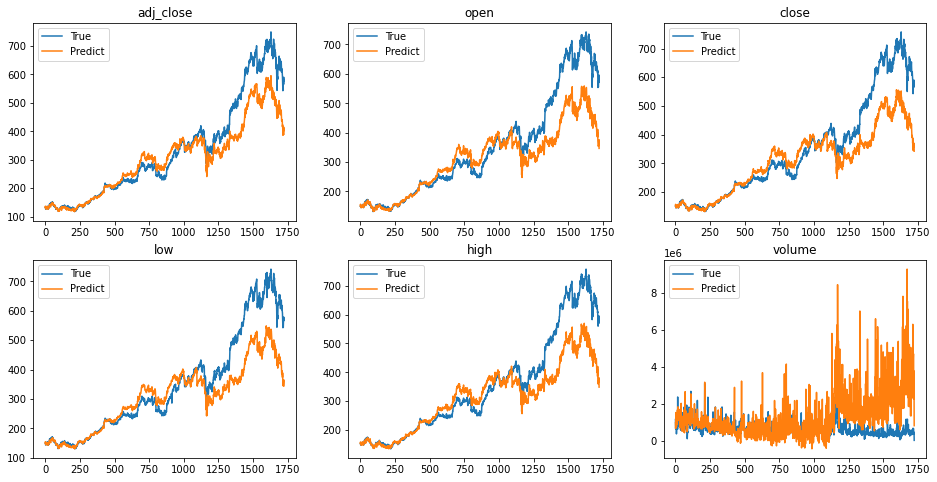

In [21]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.plot(y_test_adj, label = 'True')
ax1.plot(y_test_adj_lr, label = 'Predict')
ax1.legend()
ax2.plot(y_test_opn, label = 'True')
ax2.plot(y_test_opn_lr, label = 'Predict')
ax2.legend()
ax3.plot(y_test_cls, label = 'True')
ax3.plot(y_test_cls_lr, label = 'Predict')
ax3.legend()
ax4.plot(y_test_low, label = 'True')
ax4.plot(y_test_low_lr, label = 'Predict')
ax4.legend()
ax5.plot(y_test_hgh, label = 'True')
ax5.plot(y_test_hgh_lr, label = 'Predict')
ax5.legend()
ax6.plot(y_test_vol, label = 'True')
ax6.plot(y_test_vol_lr, label = 'Predict')
ax6.legend()

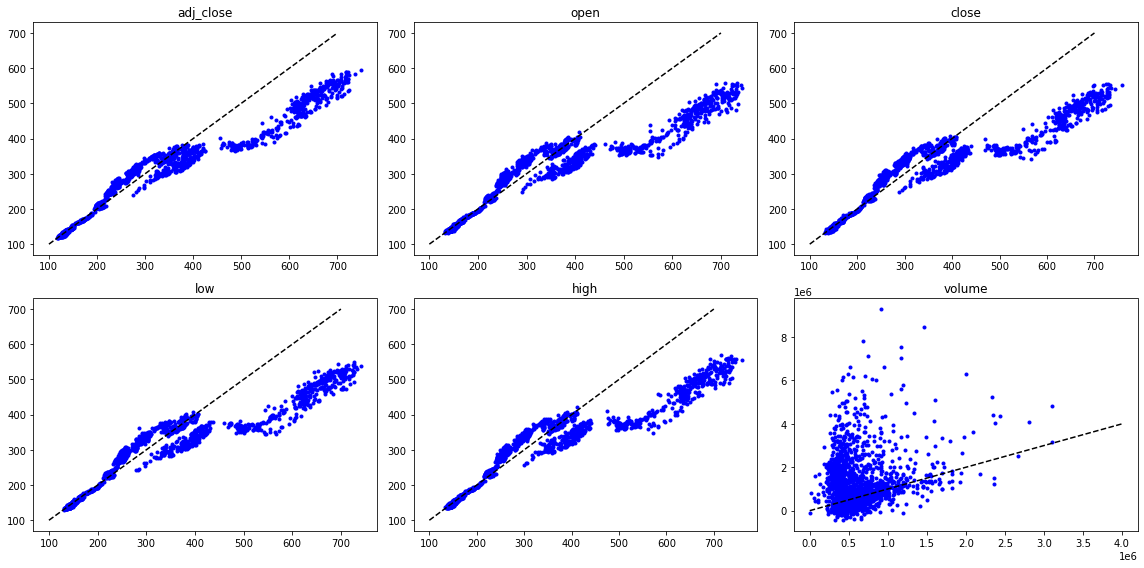

In [22]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.scatter(y_test_adj, y_test_adj_lr, marker='.', color = 'b')
ax1.plot([100, 700], [100, 700], '--k')   
ax1.axis('tight')
plt.tight_layout()
ax2.scatter(y_test_opn, y_test_opn_lr, marker='.', color = 'b')
ax2.plot([100, 700], [100, 700], '--k')   
ax2.axis('tight')
plt.tight_layout()
ax3.scatter(y_test_cls, y_test_cls_lr, marker='.', color = 'b')
ax3.plot([100, 700], [100, 700], '--k')   
ax3.axis('tight')
plt.tight_layout()
ax4.scatter(y_test_low, y_test_low_lr, marker='.', color = 'b')
ax4.plot([100, 700], [100, 700], '--k')   
ax4.axis('tight')
plt.tight_layout()
ax5.scatter(y_test_hgh, y_test_hgh_lr, marker='.', color = 'b')
ax5.plot([100, 700], [100, 700], '--k')   
ax5.axis('tight')
plt.tight_layout()
ax6.scatter(y_test_vol, y_test_vol_lr, marker='.', color = 'b')
ax6.plot([0, 4000000], [0, 4000000], '--k')   
ax6.axis('tight')
plt.tight_layout()

# Ridge Regression

In [23]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([1,5,10,15,20,25,30,35,40,45,90,95,100,105,110,115,120,125,130]))
rcv.fit(X_train_0, y_train_adj)
print(rcv.alpha_)
rcv.fit(X_train_0, y_train_cls)
print(rcv.alpha_)
rcv.fit(X_train_0, y_train_opn)
print(rcv.alpha_)
rcv.fit(X_train_0, y_train_low)
print(rcv.alpha_)
rcv.fit(X_train_0, y_train_hgh)
print(rcv.alpha_)
rcv.fit(X_train_0, y_train_vol)
print(rcv.alpha_)

90
30
115
95
95
40


In [24]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=90)
rid.fit(X_train_0, y_train_adj)
y_test_adj_rid = rid.predict(X_test_0)
print ('The r2 score of RidgeRegression on test_adj is', r2_score(y_test_adj, y_test_adj_rid))
print ('The RMSE of RidgeRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_rid)))
print ()

rid = Ridge(alpha=30)
rid.fit(X_train_0, y_train_cls)
y_test_cls_rid = rid.predict(X_test_0)
print ('The r2 score of RidgeRegression on test_cls is', r2_score(y_test_cls, y_test_cls_rid))
print ('The RMSE of RidgeRegression on test_cls is', np.sqrt(mean_squared_error(y_test_cls, y_test_cls_rid)))
print ()

rid = Ridge(alpha=115)
rid.fit(X_train_0, y_train_opn)
y_test_opn_rid = rid.predict(X_test_0)
print ('The r2 score of RidgeRegression on test_opn is', r2_score(y_test_opn, y_test_opn_rid))
print ('The RMSE of RidgeRegression on test_opn is', np.sqrt(mean_squared_error(y_test_opn, y_test_opn_rid)))
print ()

rid = Ridge(alpha=95)
rid.fit(X_train_0, y_train_low)
y_test_low_rid = rid.predict(X_test_0)
print ('The r2 score of RidgeRegression on test_low is', r2_score(y_test_low, y_test_low_rid))
print ('The RMSE of RidgeRegression on test_low is', np.sqrt(mean_squared_error(y_test_low, y_test_low_rid)))
print ()

rid = Ridge(alpha=95)
rid.fit(X_train_0, y_train_hgh)
y_test_hgh_rid = rid.predict(X_test_0)
print ('The r2 score of RidgeRegression on test_hghj is', r2_score(y_test_hgh, y_test_hgh_rid))
print ('The RMSE of RidgeRegression on test_hgh is', np.sqrt(mean_squared_error(y_test_hgh, y_test_hgh_rid)))
print ()

rid = Ridge(alpha=40)
rid.fit(X_train_0, y_train_vol)
y_test_vol_rid = rid.predict(X_test_0)
print ('The r2 score of RidgeRegression on test_vol is', r2_score(y_test_vol, y_test_vol_rid))
print ('The RMSE of RidgeRegression on test_vol is', np.sqrt(mean_squared_error(y_test_vol, y_test_vol_rid)))

The r2 score of RidgeRegression on test_adj is 0.8512924184670904
The RMSE of RidgeRegression on test_adj is 67.82790364930156

The r2 score of RidgeRegression on test_cls is 0.7421144589194777
The RMSE of RidgeRegression on test_cls is 87.69100674693784

The r2 score of RidgeRegression on test_opn is 0.7521903492369438
The RMSE of RidgeRegression on test_opn is 85.99077623856294

The r2 score of RidgeRegression on test_low is 0.7457353359959905
The RMSE of RidgeRegression on test_low is 85.97275605081755

The r2 score of RidgeRegression on test_hghj is 0.7585999649830641
The RMSE of RidgeRegression on test_hgh is 85.82280655691196

The r2 score of RidgeRegression on test_vol is -14.727312712400229
The RMSE of RidgeRegression on test_vol is 1322359.0008294324


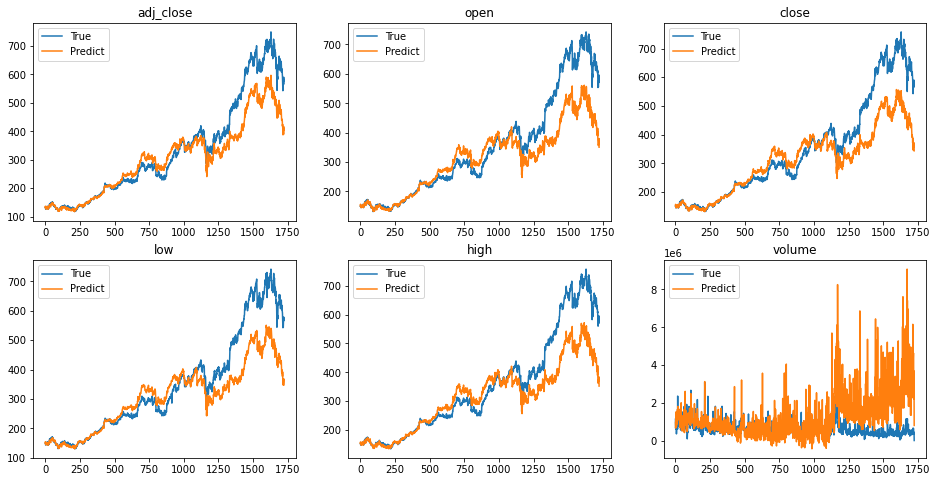

In [25]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.plot(y_test_adj, label = 'True')
ax1.plot(y_test_adj_rid, label = 'Predict')
ax1.legend()
ax2.plot(y_test_opn, label = 'True')
ax2.plot(y_test_opn_rid, label = 'Predict')
ax2.legend()
ax3.plot(y_test_cls, label = 'True')
ax3.plot(y_test_cls_rid, label = 'Predict')
ax3.legend()
ax4.plot(y_test_low, label = 'True')
ax4.plot(y_test_low_rid, label = 'Predict')
ax4.legend()
ax5.plot(y_test_hgh, label = 'True')
ax5.plot(y_test_hgh_rid, label = 'Predict')
ax5.legend()
ax6.plot(y_test_vol, label = 'True')
ax6.plot(y_test_vol_rid, label = 'Predict')
ax6.legend()

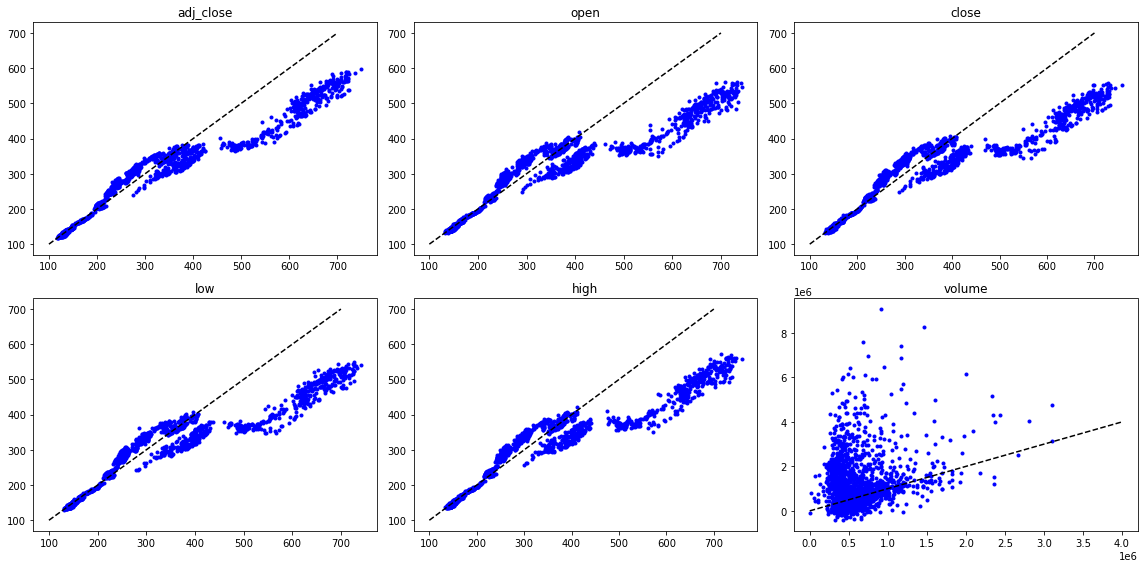

In [26]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.scatter(y_test_adj, y_test_adj_rid, marker='.', color = 'b')
ax1.plot([100, 700], [100, 700], '--k')   
ax1.axis('tight')
plt.tight_layout()
ax2.scatter(y_test_opn, y_test_opn_rid, marker='.', color = 'b')
ax2.plot([100, 700], [100, 700], '--k')   
ax2.axis('tight')
plt.tight_layout()
ax3.scatter(y_test_cls, y_test_cls_rid, marker='.', color = 'b')
ax3.plot([100, 700], [100, 700], '--k')   
ax3.axis('tight')
plt.tight_layout()
ax4.scatter(y_test_low, y_test_low_rid, marker='.', color = 'b')
ax4.plot([100, 700], [100, 700], '--k')   
ax4.axis('tight')
plt.tight_layout()
ax5.scatter(y_test_hgh, y_test_hgh_rid, marker='.', color = 'b')
ax5.plot([100, 700], [100, 700], '--k')   
ax5.axis('tight')
plt.tight_layout()
ax6.scatter(y_test_vol, y_test_vol_rid, marker='.', color = 'b')
ax6.plot([0, 4000000], [0, 4000000], '--k')   
ax6.axis('tight')
plt.tight_layout()

# Lasso Regression

## informations originales

In [27]:
# Découvrez comment différents alphas affectent les résultats
from sklearn.linear_model import Lasso

lss = Lasso(alpha=0.01)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()
lss = Lasso(alpha=0.1)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()
lss = Lasso(alpha=1)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()
lss = Lasso(alpha=10)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()
lss = Lasso(alpha=100)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()
lss = Lasso(alpha=1000)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29136.383096469875, tolerance: 410.278940198747
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30133.062954127585, tolerance: 410.278940198747
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17117.597584769075, tolerance: 410.278940198747
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

The r2 score of LassoRegression on test_adj is 0.8685863915957882
The RMSE of LassoRegression on test_adj is 63.76201152930468

The r2 score of LassoRegression on test_adj is 0.8691132511704824
The RMSE of LassoRegression on test_adj is 63.634066771549854

The r2 score of LassoRegression on test_adj is 0.900154244117847
The RMSE of LassoRegression on test_adj is 55.57847726387992

The r2 score of LassoRegression on test_adj is 0.8735826875782965
The RMSE of LassoRegression on test_adj is 62.5381623860586

The r2 score of LassoRegression on test_adj is 0.724049175540656
The RMSE of LassoRegression on test_adj is 92.39696100303993

The r2 score of LassoRegression on test_adj is -0.2554127451730339
The RMSE of LassoRegression on test_adj is 197.07662032629554



In [28]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=np.array([10,15,20,25,30,40,50,55,60,65,70,100,1000000,2000000,3000000]), max_iter=100000)
lcv.fit(X_train_0, y_train_adj)
print(lcv.alpha_)
lcv.fit(X_train_0, y_train_cls)
print(lcv.alpha_)
lcv.fit(X_train_0, y_train_opn)
print(lcv.alpha_)
lcv.fit(X_train_0, y_train_low)
print(lcv.alpha_)
lcv.fit(X_train_0, y_train_hgh)
print(lcv.alpha_)
lcv.fit(X_train_0, y_train_vol)
print(lcv.alpha_)

20
65
65
65
65


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2258741352330.625, tolerance: 172349713879.4955
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150098492786422.0, tolerance: 149151245718.2525
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2235372641210.75, tolerance: 197973996380.36447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:510: Ru

2000000


In [29]:
from sklearn.linear_model import Lasso

lss = Lasso(alpha=20)
lss.fit(X_train_0, y_train_adj)
y_test_adj_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()

lss = Lasso(alpha=65)
lss.fit(X_train_0, y_train_cls)
y_test_cls_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_cls is', r2_score(y_test_cls, y_test_cls_lss))
print ('The RMSE of LassoRegression on test_cls is', np.sqrt(mean_squared_error(y_test_cls, y_test_cls_lss)))
print ()

lss = Lasso(alpha=65)
lss.fit(X_train_0, y_train_opn)
y_test_opn_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_opn is', r2_score(y_test_opn, y_test_opn_lss))
print ('The RMSE of LassoRegression on test_opn is', np.sqrt(mean_squared_error(y_test_opn, y_test_opn_lss)))
print ()

lss = Lasso(alpha=65)
lss.fit(X_train_0, y_train_low)
y_test_low_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_low is', r2_score(y_test_low, y_test_low_lss))
print ('The RMSE of LassoRegression on test_low is', np.sqrt(mean_squared_error(y_test_low, y_test_low_lss)))
print ()

lss = Lasso(alpha=65)
lss.fit(X_train_0, y_train_hgh)
y_test_hgh_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_hghj is', r2_score(y_test_hgh, y_test_hgh_lss))
print ('The RMSE of LassoRegression on test_hgh is', np.sqrt(mean_squared_error(y_test_hgh, y_test_hgh_lss)))
print ()

lss = Lasso(alpha=2000000)
lss.fit(X_train_0, y_train_vol)
y_test_vol_lss = lss.predict(X_test_0)
print ('The r2 score of LassoRegression on test_vol is', r2_score(y_test_vol, y_test_vol_lss))
print ('The RMSE of LassoRegression on test_vol is', np.sqrt(mean_squared_error(y_test_vol, y_test_vol_lss)))

The r2 score of LassoRegression on test_adj is 0.8616381355851506
The RMSE of LassoRegression on test_adj is 65.4259506881142

The r2 score of LassoRegression on test_cls is 0.9142472248388788
The RMSE of LassoRegression on test_cls is 50.56682097697182

The r2 score of LassoRegression on test_opn is 0.9155696918579078
The RMSE of LassoRegression on test_opn is 50.19286070393172

The r2 score of LassoRegression on test_low is 0.9145429997713556
The RMSE of LassoRegression on test_low is 49.841564559307656

The r2 score of LassoRegression on test_hghj is 0.9138779744251049
The RMSE of LassoRegression on test_hgh is 51.261482991760474

The r2 score of LassoRegression on test_vol is -0.40527849891590373
The RMSE of LassoRegression on test_vol is 395278.6115164094


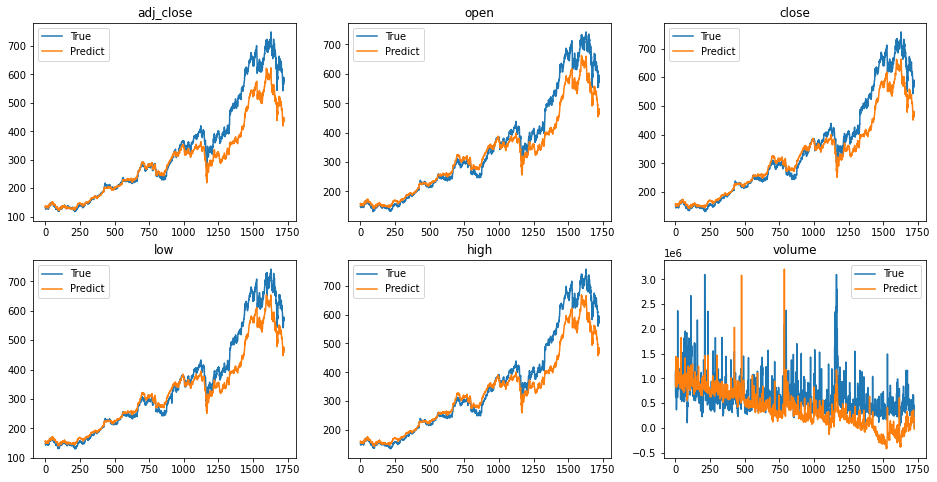

In [30]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.plot(y_test_adj, label = 'True')
ax1.plot(y_test_adj_lss, label = 'Predict')
ax1.legend()
ax2.plot(y_test_opn, label = 'True')
ax2.plot(y_test_opn_lss, label = 'Predict')
ax2.legend()
ax3.plot(y_test_cls, label = 'True')
ax3.plot(y_test_cls_lss, label = 'Predict')
ax3.legend()
ax4.plot(y_test_low, label = 'True')
ax4.plot(y_test_low_lss, label = 'Predict')
ax4.legend()
ax5.plot(y_test_hgh, label = 'True')
ax5.plot(y_test_hgh_lss, label = 'Predict')
ax5.legend()
ax6.plot(y_test_vol, label = 'True')
ax6.plot(y_test_vol_lss, label = 'Predict')
ax6.legend()

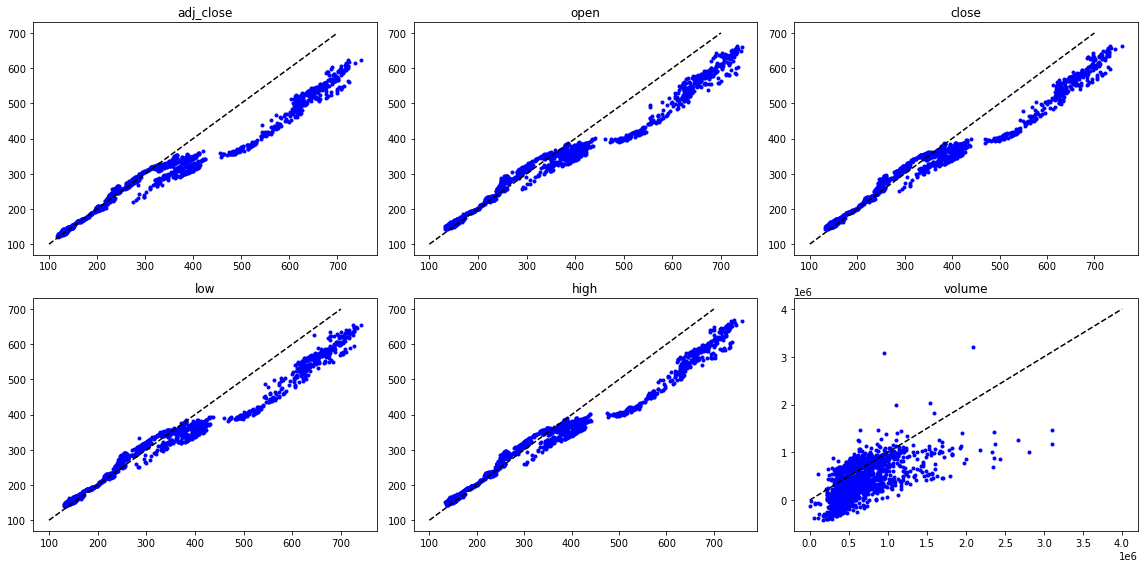

In [31]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.scatter(y_test_adj, y_test_adj_lss, marker='.', color = 'b')
ax1.plot([100, 700], [100, 700], '--k')   
ax1.axis('tight')
plt.tight_layout()
ax2.scatter(y_test_opn, y_test_opn_lss, marker='.', color = 'b')
ax2.plot([100, 700], [100, 700], '--k')   
ax2.axis('tight')
plt.tight_layout()
ax3.scatter(y_test_cls, y_test_cls_lss, marker='.', color = 'b')
ax3.plot([100, 700], [100, 700], '--k')   
ax3.axis('tight')
plt.tight_layout()
ax4.scatter(y_test_low, y_test_low_lss, marker='.', color = 'b')
ax4.plot([100, 700], [100, 700], '--k')   
ax4.axis('tight')
plt.tight_layout()
ax5.scatter(y_test_hgh, y_test_hgh_lss, marker='.', color = 'b')
ax5.plot([100, 700], [100, 700], '--k')   
ax5.axis('tight')
plt.tight_layout()
ax6.scatter(y_test_vol, y_test_vol_lss, marker='.', color = 'b')
ax6.plot([0, 4000000], [0, 4000000], '--k')   
ax6.axis('tight')
plt.tight_layout()

## Rejoignez les informations sur le cours de l'action d'ouverture de LV

In [32]:
X_train_1.head()

,CDI_adj_close,CDI_close,CDI_high,CDI_low,CDI_open,CDI_volume,RMS_adj_close,RMS_close,RMS_high,RMS_low,RMS_open,RMS_volume,MC_open,KER_adj_close,KER_close,KER_high,KER_low,KER_open,KER_volume
0,32.844299,61.820000,63.950001,61.750000,62.200001,424416,37.210770,49.033333,50.000000,48.333332,49.666664,16395,91.779999,120.705658,239.145950,249.091003,235.149338,246.116775,185169
1,29.688440,55.880001,62.619999,55.680000,62.619999,1132848,34.934105,46.033333,48.766666,45.533333,48.766666,33063,90.800003,115.404533,228.643234,242.584900,226.040787,244.443787,349132
2,27.892687,52.500000,54.750000,52.150002,54.619999,962416,32.379189,42.666664,45.000000,41.833332,45.000000,55344,79.000000,109.540474,217.025177,222.973633,216.095734,222.973633,444817
3,27.016062,50.849998,53.020000,50.849998,53.020000,813360,31.620296,41.666664,42.666664,41.666664,42.666664,97941,77.599998,104.614662,207.266022,216.932236,205.407135,216.560455,591143
4,28.094572,52.880001,54.250000,51.279999,51.279999,909968,33.643993,44.333332,44.333332,42.000000,42.666664,131712,76.400002,102.878922,203.827072,210.054352,202.247025,208.195465,460670


In [33]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=np.array([0.00000001,0.000001,0.00001,0.0005, 0.001,0.003,0.005,0.01,0.03,0.05,1,2,2.5,3,3.5,4,13,13.5,14]), max_iter=100000)
lcv.fit(X_train_1, y_train_adj)
print(lcv.alpha_)
lcv.fit(X_train_1, y_train_cls)
print(lcv.alpha_)
lcv.fit(X_train_1, y_train_opn)
print(lcv.alpha_)
lcv.fit(X_train_1, y_train_low)
print(lcv.alpha_)
lcv.fit(X_train_1, y_train_hgh)
print(lcv.alpha_)
#lcv.fit(X_train_1, y_train_vol)
#print(lcv.alpha_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.2725719590675, tolerance: 333.14375543065324
  model = cd_fast.enet_coordinate_descent_gram(


2.5
13.5
1e-08
0.005
0.005


In [34]:
from sklearn.linear_model import Lasso

lss = Lasso(alpha=2.5)
lss.fit(X_train_1, y_train_adj)
y_test_adj_lss = lss.predict(X_test_1)
print ('The r2 score of LassoRegression on test_adj is', r2_score(y_test_adj, y_test_adj_lss))
print ('The RMSE of LassoRegression on test_adj is', np.sqrt(mean_squared_error(y_test_adj, y_test_adj_lss)))
print ()

lss = Lasso(alpha=13.5)
lss.fit(X_train_1, y_train_cls)
y_test_cls_lss = lss.predict(X_test_1)
print ('The r2 score of LassoRegression on test_cls is', r2_score(y_test_cls, y_test_cls_lss))
print ('The RMSE of LassoRegression on test_cls is', np.sqrt(mean_squared_error(y_test_cls, y_test_cls_lss)))
print ()

lss = Lasso(alpha=0.00000001)
lss.fit(X_train_1, y_train_opn)
y_test_opn_lss = lss.predict(X_test_1)
print ('The r2 score of LassoRegression on test_opn is', r2_score(y_test_opn, y_test_opn_lss))
print ('The RMSE of LassoRegression on test_opn is', np.sqrt(mean_squared_error(y_test_opn, y_test_opn_lss)))
print ()

lss = Lasso(alpha=0.005)
lss.fit(X_train_1, y_train_low)
y_test_low_lss = lss.predict(X_test_1)
print ('The r2 score of LassoRegression on test_low is', r2_score(y_test_low, y_test_low_lss))
print ('The RMSE of LassoRegression on test_low is', np.sqrt(mean_squared_error(y_test_low, y_test_low_lss)))
print ()

lss = Lasso(alpha=0.005)
lss.fit(X_train_1, y_train_hgh)
y_test_hgh_lss = lss.predict(X_test_1)
print ('The r2 score of LassoRegression on test_hghj is', r2_score(y_test_hgh, y_test_hgh_lss))
print ('The RMSE of LassoRegression on test_hgh is', np.sqrt(mean_squared_error(y_test_hgh, y_test_hgh_lss)))
print ()

lss = Lasso(alpha=10000000000)
lss.fit(X_train_1, y_train_vol)
y_test_vol_lss = lss.predict(X_test_1)
print ('The r2 score of LassoRegression on test_vol is', r2_score(y_test_vol, y_test_vol_lss))
print ('The RMSE of LassoRegression on test_vol is', np.sqrt(mean_squared_error(y_test_vol, y_test_vol_lss)))

The r2 score of LassoRegression on test_adj is 0.9675499327322739
The RMSE of LassoRegression on test_adj is 31.684702954946253

The r2 score of LassoRegression on test_cls is 0.9955162736181256
The RMSE of LassoRegression on test_cls is 11.562749327001711

The r2 score of LassoRegression on test_opn is 0.9999939704966512
The RMSE of LassoRegression on test_opn is 0.4241637323226316

The r2 score of LassoRegression on test_low is 0.9996560063028986
The RMSE of LassoRegression on test_low is 3.1622273265453815

The r2 score of LassoRegression on test_hghj is 0.9992608983894422
The RMSE of LassoRegression on test_hgh is 4.748824529470521

The r2 score of LassoRegression on test_vol is -0.2899575416907154
The RMSE of LassoRegression on test_vol is 378712.6592688148


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 955.952975988084, tolerance: 462.17506542239045
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1152.3762582267518, tolerance: 473.38512282246296
  model = cd_fast.enet_coordinate_descent(


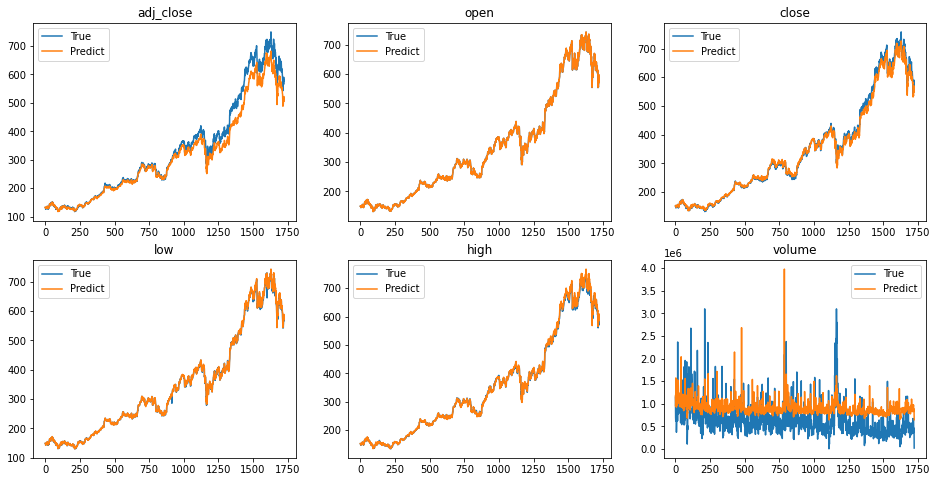

In [35]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.plot(y_test_adj, label = 'True')
ax1.plot(y_test_adj_lss, label = 'Predict')
ax1.legend()
ax2.plot(y_test_opn, label = 'True')
ax2.plot(y_test_opn_lss, label = 'Predict')
ax2.legend()
ax3.plot(y_test_cls, label = 'True')
ax3.plot(y_test_cls_lss, label = 'Predict')
ax3.legend()
ax4.plot(y_test_low, label = 'True')
ax4.plot(y_test_low_lss, label = 'Predict')
ax4.legend()
ax5.plot(y_test_hgh, label = 'True')
ax5.plot(y_test_hgh_lss, label = 'Predict')
ax5.legend()
ax6.plot(y_test_vol, label = 'True')
ax6.plot(y_test_vol_lss, label = 'Predict')
ax6.legend()

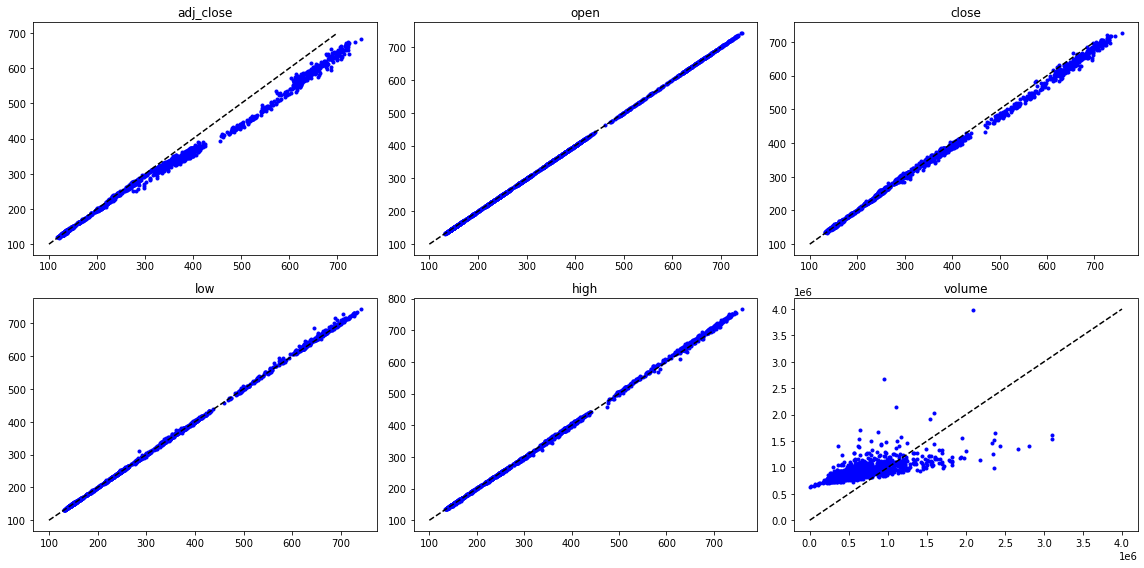

In [36]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4) 
ax5 = fig.add_subplot(2,3,5) 
ax6 = fig.add_subplot(2,3,6) 

ax1.set_title('adj_close')
ax2.set_title('open')
ax3.set_title('close')
ax4.set_title('low')
ax5.set_title('high')
ax6.set_title('volume')

ax1.scatter(y_test_adj, y_test_adj_lss, marker='.', color = 'b')
ax1.plot([100, 700], [100, 700], '--k')   
ax1.axis('tight')
plt.tight_layout()
ax2.scatter(y_test_opn, y_test_opn_lss, marker='.', color = 'b')
ax2.plot([100, 700], [100, 700], '--k')   
ax2.axis('tight')
plt.tight_layout()
ax3.scatter(y_test_cls, y_test_cls_lss, marker='.', color = 'b')
ax3.plot([100, 700], [100, 700], '--k')   
ax3.axis('tight')
plt.tight_layout()
ax4.scatter(y_test_low, y_test_low_lss, marker='.', color = 'b')
ax4.plot([100, 700], [100, 700], '--k')   
ax4.axis('tight')
plt.tight_layout()
ax5.scatter(y_test_hgh, y_test_hgh_lss, marker='.', color = 'b')
ax5.plot([100, 700], [100, 700], '--k')   
ax5.axis('tight')
plt.tight_layout()
ax6.scatter(y_test_vol, y_test_vol_lss, marker='.', color = 'b')
ax6.plot([0, 4000000], [0, 4000000], '--k')   
ax6.axis('tight')
plt.tight_layout()